<a href="https://colab.research.google.com/github/MustafaYosoufi/Data_Visualization/blob/main/Competition_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the training and test datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/train.csv')

# Display the first few rows of the datasets
print(train_df.head())
print(test_df.head())

   id  N_Days             Drug      Age Sex Ascites Hepatomegaly Spiders  \
0   0  1690.0          Placebo  16714.0   F       N            Y       Y   
1   1  2216.0  D-penicillamine  19327.0   F       Y            Y       N   
2   2  1725.0          Placebo  12897.0   F       N            N       N   
3   3  2468.0  D-penicillamine  20555.0   F       N            N       Y   
4   4   999.0  D-penicillamine  26580.0   M       N            N       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N       14.4        514.0     3.16    42.0    2184.0  185.00   
1     N        1.3          NaN     3.03   234.0     601.0  135.00   
2     N        0.8        232.0     3.85     9.0    1074.0  128.65   
3     N        0.5        176.0     3.61   121.0     558.0   96.10   
4     N        1.8        318.0     3.52    73.0     721.0   85.25   

   Tryglicerides  Platelets  Prothrombin  Stage Status  
0          126.0      319.0         13.2    4.0      D  
1       

Step 2 Handle Missing Values

In [3]:
# Check for missing values in the training dataset
print(train_df.isnull().sum())

# Check for missing values in the test dataset
print(test_df.isnull().sum())

# Handle missing values by imputing with the mean (for numerical columns) or mode (for categorical columns)
from sklearn.impute import SimpleImputer

# Impute numerical columns with the mean
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
train_df[numerical_cols] = imputer_num.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = imputer_num.transform(test_df[numerical_cols])

# Impute categorical columns with the mode
categorical_cols = train_df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
train_df[categorical_cols] = imputer_cat.fit_transform(train_df[categorical_cols])
test_df[categorical_cols] = imputer_cat.transform(test_df[categorical_cols])

# Verify that there are no missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id                  0
N_Days              0
Drug             6508
Age                 0
Sex                 0
Ascites          6506
Hepatomegaly     6513
Spiders          6515
Edema               0
Bilirubin           0
Cholesterol      8388
Albumin             0
Copper           6636
Alk_Phos         6515
SGOT             6520
Tryglicerides    8440
Platelets         571
Prothrombin        21
Stage               0
Status              0
dtype: int64
id                  0
N_Days              0
Drug             6508
Age                 0
Sex                 0
Ascites          6506
Hepatomegaly     6513
Spiders          6515
Edema               0
Bilirubin           0
Cholesterol      8388
Albumin             0
Copper           6636
Alk_Phos         6515
SGOT             6520
Tryglicerides    8440
Platelets         571
Prothrombin        21
Stage               0
Status              0
dtype: int64
id               0
N_Days           0
Drug             0
Age              0
Sex              0

step 3 Handle outliers

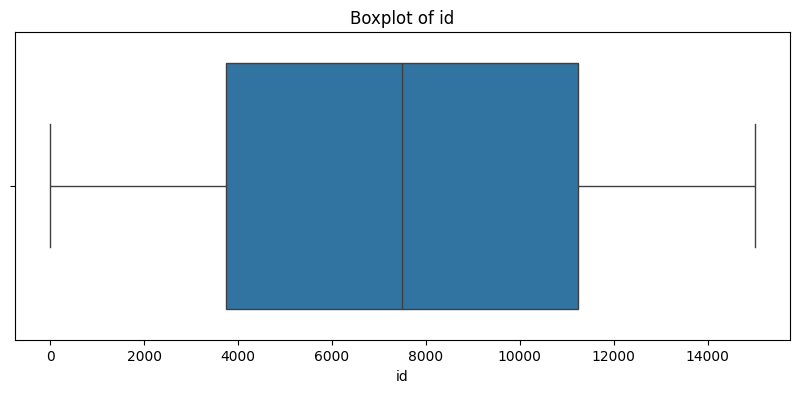

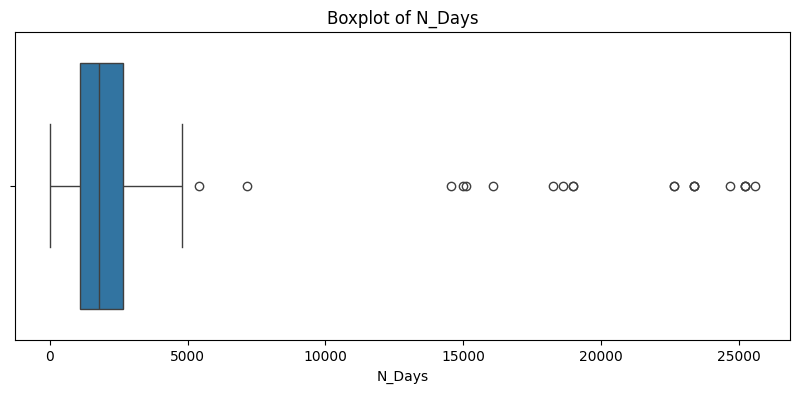

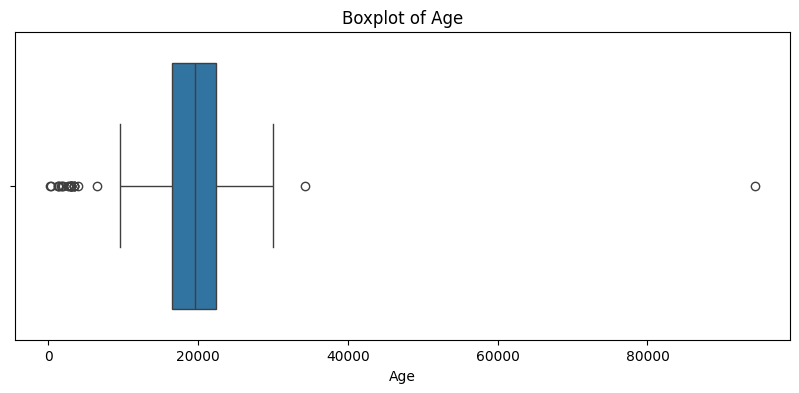

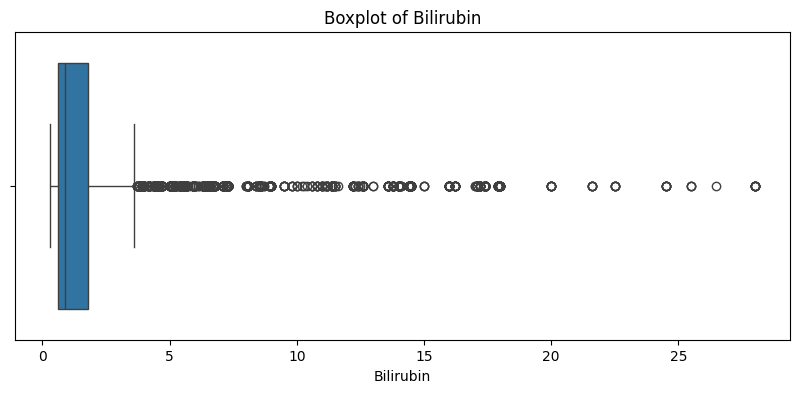

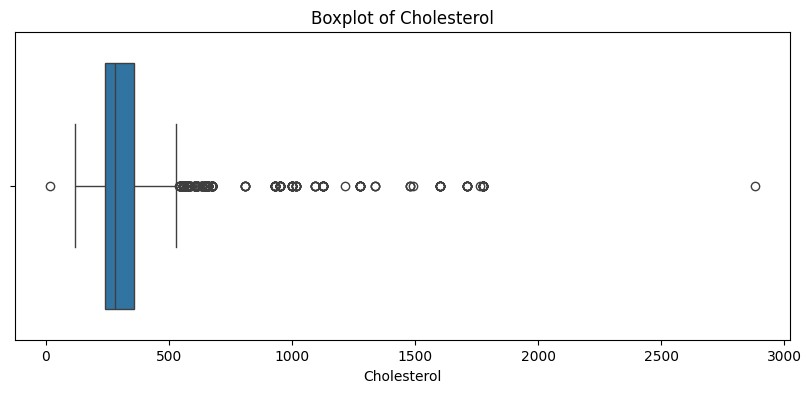

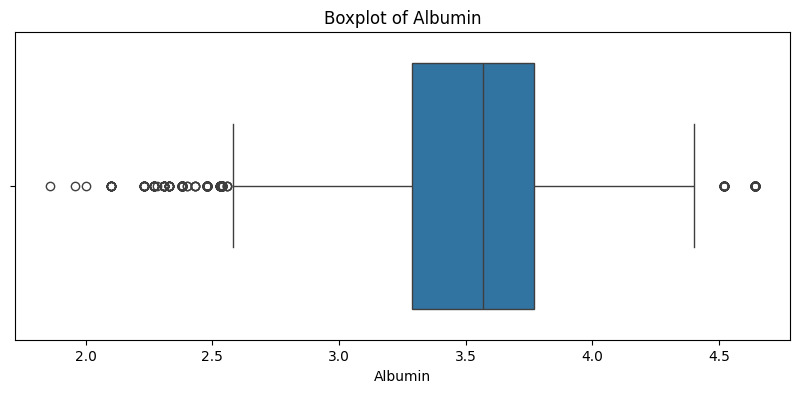

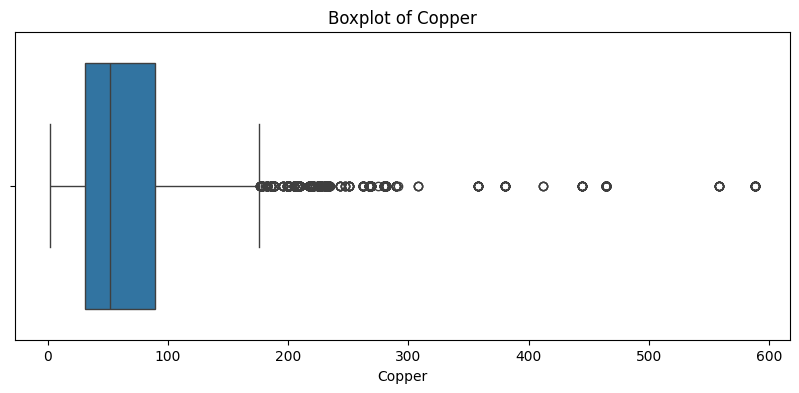

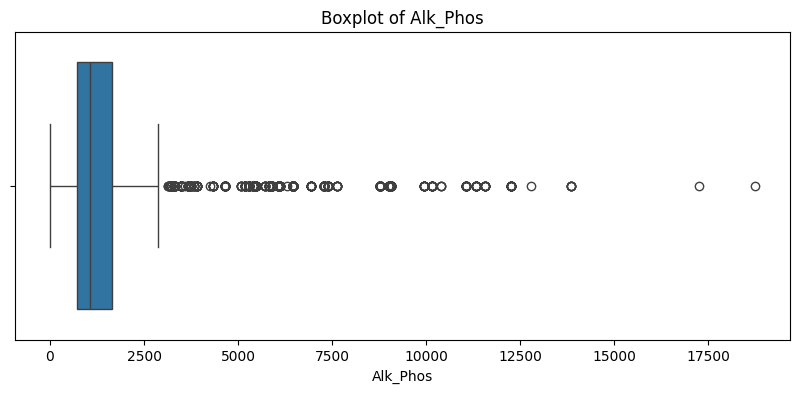

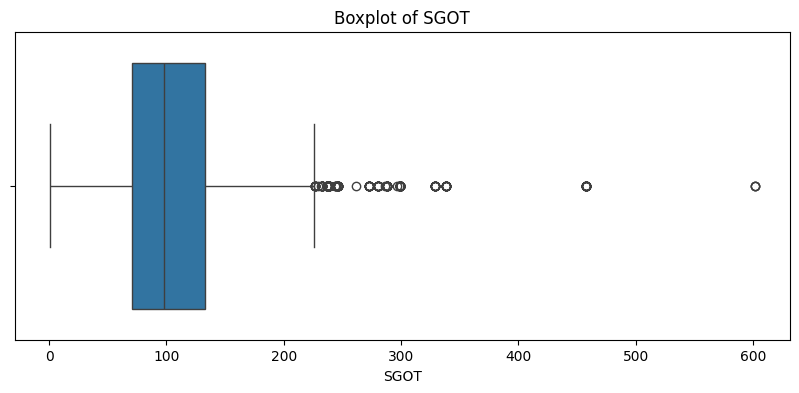

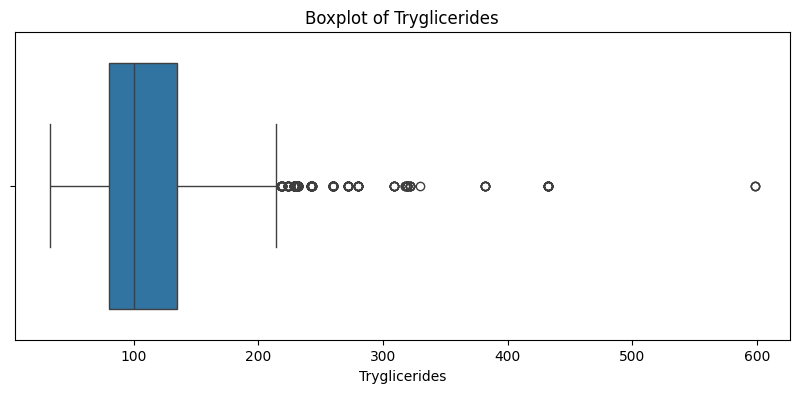

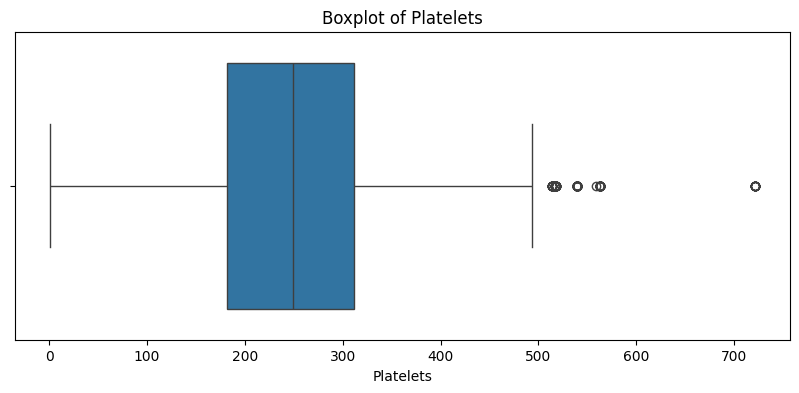

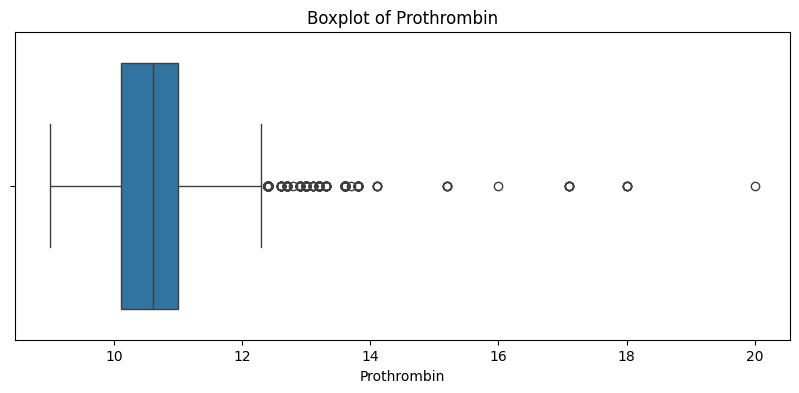

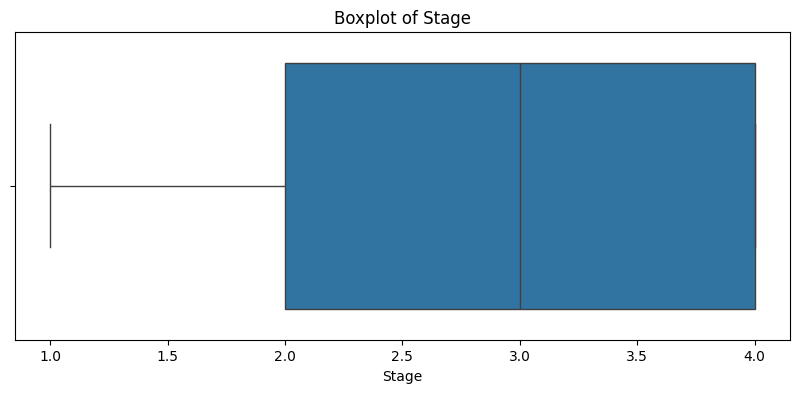

In [19]:
# Visualize the distribution of numerical features to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handling outliers by capping them at the 1st and 99th percentiles
for col in numerical_cols:
    lower_bound = train_df[col].quantile(0.01)
    upper_bound = train_df[col].quantile(0.99)
    train_df[col] = np.where(train_df[col] < lower_bound, lower_bound, train_df[col])
    train_df[col] = np.where(train_df[col] > upper_bound, upper_bound, train_df[col])
    test_df[col] = np.where(test_df[col] < lower_bound, lower_bound, test_df[col])
    test_df[col] = np.where(test_df[col] > upper_bound, upper_bound, test_df[col])

  4 Encode Categorical Variables

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'Status' in the training dataset
label_encoder = LabelEncoder()
train_df['Status'] = label_encoder.fit_transform(train_df['Status'])

# Encode other categorical variables if any
for col in categorical_cols:
    if col != 'Status':
        train_df[col] = label_encoder.fit_transform(train_df[col])
        test_df[col] = label_encoder.transform(test_df[col])

# Verify the encoding
print(train_df.head())
print(test_df.head())

       id  N_Days  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0  149.99  1690.0     1  16714.0    0        0             2        1      0   
1  149.99  2216.0     0  19327.0    0        2             2        0      0   
2  149.99  1725.0     1  12897.0    0        0             0        0      0   
3  149.99  2468.0     0  20555.0    0        0             0        1      0   
4  149.99   999.0     0  26580.0    1        0             0        0      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       14.4        514.0     3.16    42.0    2184.0  185.00          126.0   
1        1.3          NaN     3.03   234.0     601.0  135.00            NaN   
2        0.8        232.0     3.85    10.0    1074.0  128.65           99.0   
3        0.5        176.0     3.61   121.0     558.0   96.10           55.0   
4        1.8        318.0     3.52    73.0     721.0   85.25          260.0   

   Platelets  Prothrombin  Stage  Status  
0

5. Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Verify the scaling
print(train_df.head())
print(test_df.head())

         id    N_Days  Drug       Age  Sex  Ascites  Hepatomegaly  Spiders  \
0 -1.698309 -0.240873     1 -0.710189    0        0             2        1   
1 -1.698309  0.245708     0  0.013583    0        2             2        0   
2 -1.698309 -0.208496     1 -1.767455    0        0             0        0   
3 -1.698309  0.478822     0  0.353725    0        0             0        1   
4 -1.698309 -0.880088     0  2.022582    1        0             0        0   

   Edema  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0      0   4.800262     1.344172 -0.983147 -0.466454  0.323699  1.628721   
1      0  -0.212277          NaN -1.340661  2.224616 -0.577935  0.597566   
2      0  -0.403595    -0.618499  0.914427 -0.914966 -0.308527  0.466610   
3      0  -0.518386    -1.008250  0.254401  0.640809 -0.602426 -0.204672   
4      0  -0.020958    -0.019954  0.006892 -0.031958 -0.509586 -0.428432   

   Tryglicerides  Platelets  Prothrombin     Stage  Status  
0       0.320

6. Feature Engineering

Model Development

In [22]:
from sklearn.model_selection import train_test_split

# Assume 'train_df' is the preprocessed training dataframe
# Features and target variable
X = train_df.drop(columns=['Status'])
y = train_df['Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 12000
Validation set size: 3000


Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_pred_log_reg = log_reg.predict_proba(X_val)

# Evaluate model
log_loss_val_log_reg = log_loss(y_val, y_val_pred_log_reg)
print(f'Log Loss (Logistic Regression): {log_loss_val_log_reg}')

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Decission Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_pred_decision_tree = decision_tree.predict_proba(X_val)

# Evaluate model
log_loss_val_decision_tree = log_loss(y_val, y_val_pred_decision_tree)
print(f'Log Loss (Decision Tree): {log_loss_val_decision_tree}')

Log Loss (Decision Tree): 8.290040279496946


Rondom Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_pred_random_forest = random_forest.predict_proba(X_val)

# Evaluate model
log_loss_val_random_forest = log_loss(y_val, y_val_pred_random_forest)
print(f'Log Loss (Random Forest): {log_loss_val_random_forest}')

Log Loss (Random Forest): 0.5008856887757416


XGBoost

In [13]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_pred_xgb = xgb_model.predict_proba(X_val)

# Evaluate model
log_loss_val_xgb = log_loss(y_val, y_val_pred_xgb)
print(f'Log Loss (XGBoost): {log_loss_val_xgb}')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:40:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Log Loss (XGBoost): 0.40046080916516424


select the best model

In [14]:
# Print log loss of all models
print(f'Log Loss (Logistic Regression): {log_loss_val_log_reg}')
print(f'Log Loss (Decision Tree): {log_loss_val_decision_tree}')
print(f'Log Loss (Random Forest): {log_loss_val_random_forest}')
print(f'Log Loss (XGBoost): {log_loss_val_xgb}')

# Choose the model with the lowest log loss
best_model = min(
    [
        ('Logistic Regression', log_loss_val_log_reg),
        ('Decision Tree', log_loss_val_decision_tree),
        ('Random Forest', log_loss_val_random_forest),
        ('XGBoost', log_loss_val_xgb)
    ],
    key=lambda x: x[1]
)

print(f'Best Model: {best_model[0]} with Log Loss: {best_model[1]}')

Log Loss (Logistic Regression): 0.4318477596959216
Log Loss (Decision Tree): 8.290040279496946
Log Loss (Random Forest): 0.5008856887757416
Log Loss (XGBoost): 0.40046080916516424
Best Model: XGBoost with Log Loss: 0.40046080916516424


Make Predictions on Test Data

In [15]:
# Use the best model to predict on the test set (assuming X_test is the preprocessed test data)
if best_model[0] == 'Logistic Regression':
    test_pred = log_reg.predict_proba(X_test)
elif best_model[0] == 'Decision Tree':
    test_pred = decision_tree.predict_proba(X_test)
elif best_model[0] == 'Random Forest':
    test_pred = random_forest.predict_proba(X_test)
elif best_model[0] == 'XGBoost':
    test_pred = xgb_model.predict_proba(X_test)

# Create submission dataframe
submission_df = pd.DataFrame(test_pred, columns=['Status_C', 'Status_CL', 'Status_D'])
submission_df.insert(0, 'id', test_df['id'])

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

NameError: name 'X_test' is not defined